<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW11/TESSLightcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import scipy as sp
import scipy.stats as stats

# **Data Ingestion** 

In [89]:
cd drive/My\ Drive/dsps

[Errno 2] No such file or directory: 'drive/My Drive/dsps/homework11'
/content/drive/My Drive/dsps/homework11


In [0]:
#mkdir homework11

In [0]:
#cd homework11/

In [0]:
#!wget https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

In [0]:
#mv open\?id\=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9 timeseries1.rw

In [0]:
#mv 011400909.rw timesries1.rw

In [0]:
#mv 146879345.rw timeseries2.rw

In [0]:
#mv 277023834.rw timeseries3.rw

In [98]:
first = pd.read_csv('timesries1.rw', delim_whitespace= True, header= None)
secondt = pd.read_csv('timeseries2.rw', delim_whitespace= True, header= None)
thirdt = pd.read_csv('timeseries3.rw', delim_whitespace= True, header= None)
first.head()

,0,1
0,1468.277296,-0.006142
1,1468.278685,-0.006294
2,1468.280074,-0.006214
3,1468.281463,-0.006281
4,1468.282852,-0.006453


In [0]:
first.columns = ['Julian date','Magnitude']
secondt.columns =  ['Julian date','Magnitude']
thirdt.columns =  ['Julian date','Magnitude']

# **Plotting each time series**

Text(0.5, 1.0, 'Star 1 time series for magnitude')

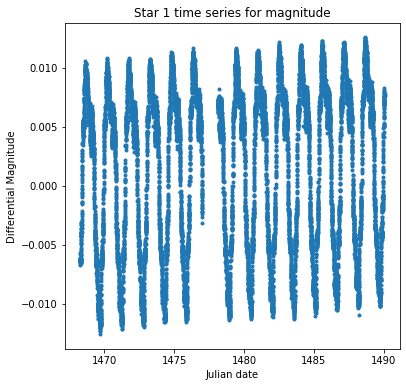

In [100]:
plt.figure(figsize=(6,6))
plt.plot(first['Julian date'], first['Magnitude'], '.')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 1 time series for magnitude')

**Figure 1:** Time series of the differential magnitude for star 1. The time series appears to be periodic since the same pattern can be seen repeating itslef at about the same time interval.

Text(0.5, 1.0, 'Star 2 time series for magnitude')

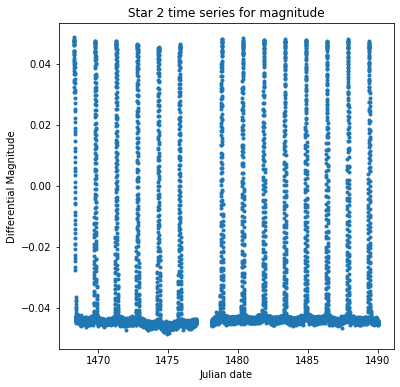

In [101]:
plt.figure(figsize=(6,6))
plt.plot(secondt['Julian date'], secondt['Magnitude'], '.')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 2 time series for magnitude')

**Figure 2:** Time series of the differential magnitude for star 2. The time series also appears to be periodic because of the repetition of the pattern in  a time interval.

Text(0.5, 1.0, 'Star 3 time series for magnitude')

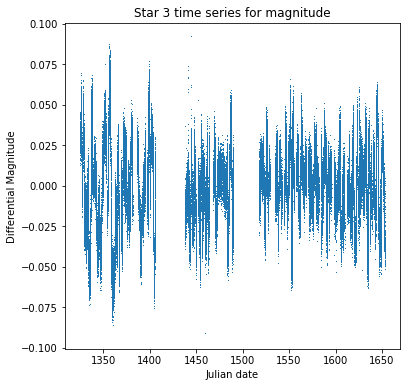

In [120]:
plt.figure(figsize=(6,6))
plt.plot(thirdt['Julian date'], thirdt['Magnitude'], ',')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 3 time series for magnitude')

**Figure 3:** Time series of the differential magnitude for star 3. This time series is harder to determine its type of variability. It appears to be cyclic, but a way to determine it will be to have more measurements to see its structure during longer periods of time. However, it could also be stochastic since it isn't clear if its variablity has any structure throughout time.

# **Computing Lomb-Scargle periodograms for each time series**

In [0]:
frequency1 = LombScargle(first['Julian date'], first['Magnitude'], normalization='psd').autopower()
frequency2 = LombScargle(secondt['Julian date'], secondt['Magnitude'], normalization='psd').autopower()
frequency3 = LombScargle(thirdt['Julian date'], thirdt['Magnitude'], normalization= 'psd').autopower()

Text(0.5, 1.0, 'Periodogram for star1')

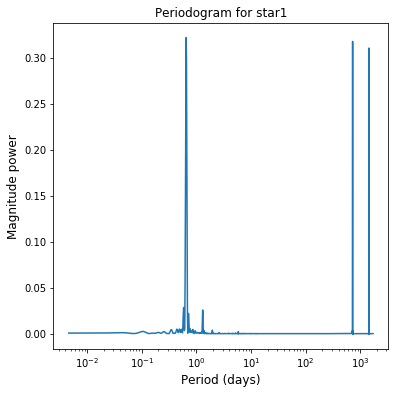

In [104]:
plt.figure(figsize=(6,6))
plt.plot(frequency1[0], frequency1[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period (days)", fontsize="large")
plt.xscale("log")
plt.title('Periodogram for star1')

**Figure 4:** Periodogram for star1. Based on the peaks it appears that its period is about less than a 100 days since it appears to be its natural frequency; while the other peaks appers to be just noise since they have such high values for the period.

Text(0.5, 1.0, 'Periodogram for star2')

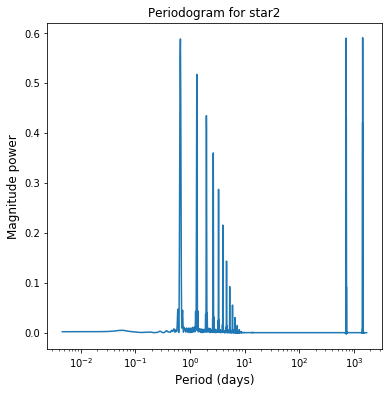

In [105]:
plt.figure(figsize=(6,6))
plt.plot(frequency2[0], frequency2[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period (days)", fontsize="large")
plt.xscale("log")
plt.title('Periodogram for star2')

**Figure 5:** Periodogram for star2. The graph shows the natural frequency to also be about less than a 100 where the first highest peak appears; the peaks that appear the after the natural frequency are probably the harmonics and that will explain their descending behavior. 

Text(0.5, 1.0, 'Periodogram for star3')

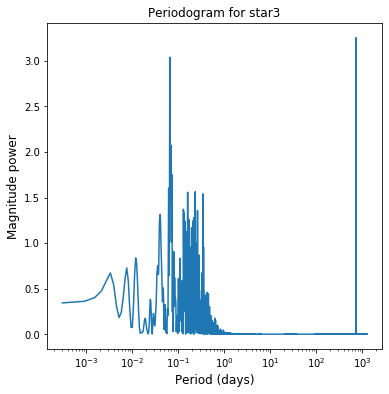

In [106]:
plt.figure(figsize=(6,6))
plt.plot(frequency3[0], frequency3[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period (days)", fontsize="large")
plt.xscale("log")
plt.title('Periodogram for star3')

**Figure 6:** Periodogram for star3. As in its time series it is hard to tell its periodicity since it has a lot of peaks, where the highest is a very high number, while the rest are in a range of about 100 days. 

In [107]:
print('Period for star1:',np.argmax(frequency1[1]))
print('Period for star2:',np.argmax(frequency2[1][:10000]))
print('Period for star3:',np.argmax(frequency3[1][:1000000]))

Period for star1: 70
Period for star2: 72
Period for star3: 108


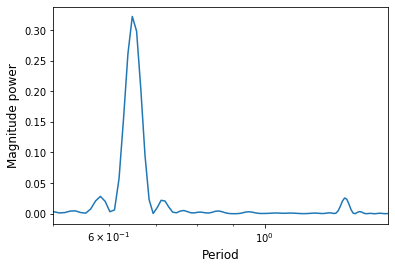

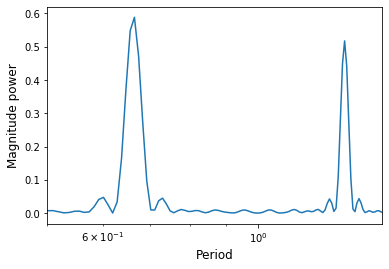

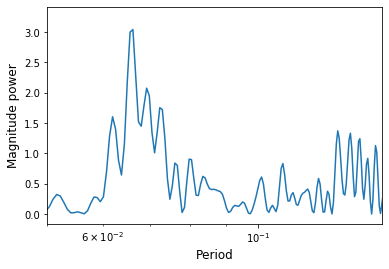

In [108]:
plt.plot(frequency1[0], frequency1[1])
plt.xlim(0.5,1.5)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period", fontsize="large")
plt.xscale("log")
plt.show()

plt.plot(frequency2[0], frequency2[1])
plt.xlim(0.5,1.5)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period", fontsize="large")
plt.xscale("log")
plt.show()

plt.plot(frequency3[0], frequency3[1])
plt.xlim(0.05,0.15)
#plt.xscale('log')
# plt.yscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Period", fontsize="large")
plt.xscale("log")
plt.show()


**Figure 7:** Each of the plots shows a close up look of each of the periodogram at the range where we find the period for each star. We can see the very defined peaks inthe first 2 graphs for star 1 and star 2, while the last graph has a lot of varyability in its waveforms.

# **Phase Folding** 

In [0]:
first_folded = pd.DataFrame()
first_folded['phase'] = np.mod(first['Julian date'], 1/frequency1[0][70])
first_folded['dmag'] = first['Magnitude']

Text(0.5, 1.0, 'Phase folded graph for star1')

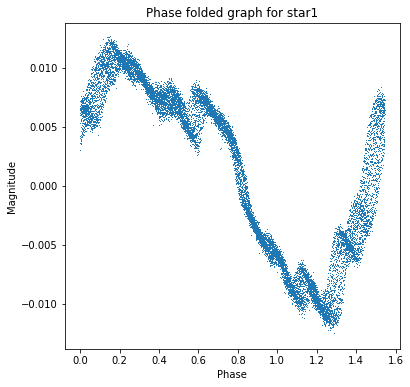

In [110]:
plt.figure(figsize=(6,6))
plt.plot(first_folded.phase, first_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star1')

**Figure 8:** Phase folding for star 1. It can be seen in the figure how the form of the data points is very similar to the pattern that composes the original time series; this is because the phase folding superimposes the cycles on top of each other, allowing us to see the cycle that the star follows.

In [0]:
second_folded = pd.DataFrame()

In [0]:
second_folded['phase'] = np.mod(secondt['Julian date'], 1/frequency2[0][72])
second_folded['dmag'] = secondt['Magnitude']

Text(0.5, 1.0, 'Phase folded graph for star2')

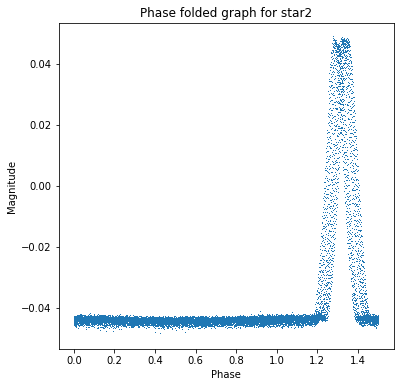

In [113]:
plt.figure(figsize=(6,6))
plt.plot(second_folded.phase, second_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star2')

**Figure 9:** Phase folding for star 2. This graph also has a very similar structure as each of patterns that make up its time series, showing that the star follows this cycle.

Text(0.5, 1.0, 'Phase folded graph for star3')

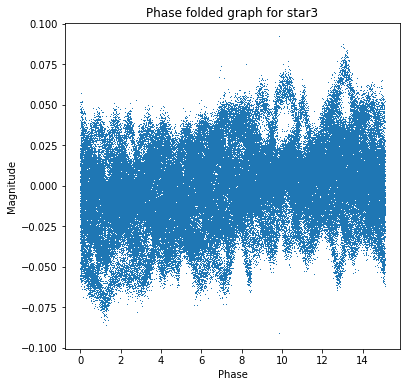

In [114]:
third_folded = pd.DataFrame()

third_folded['phase'] = np.mod(thirdt['Julian date'], 1/frequency3[0][108])
third_folded['dmag'] = thirdt['Magnitude']

plt.figure(figsize=(6,6))
plt.plot(third_folded.phase, third_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star3')

**Figure 10:** Phase folding for star 3. It is hard to tell if there is any structure of a cycle in the phase. It might be possible to see a little bit of a wave pattern but there is still a lot of noise around it, and this could tell us that the varybility for this star is stochastic.

# **Binnning**

In [0]:
means_1, edges_1, binnum_1 = stats.binned_statistic(
    first_folded.phase, first_folded.dmag, bins=20)
means_2, edges_2, binnum_2 = stats.binned_statistic(
    second_folded.phase, second_folded.dmag, bins=20)
means_3, edges_3, binnum_3 = stats.binned_statistic(
    third_folded.phase, third_folded.dmag, bins=20)

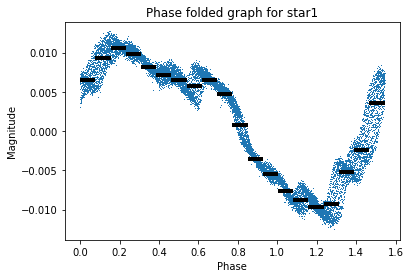

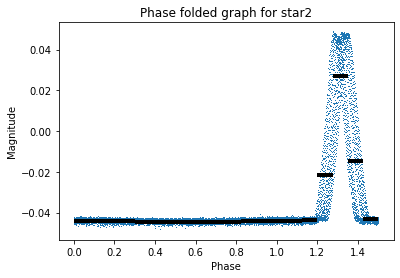

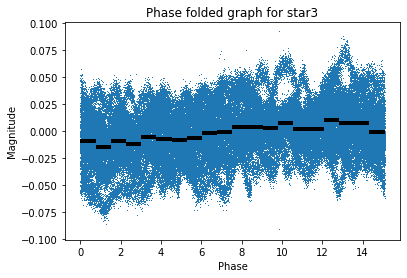

In [116]:
plt.plot(first_folded.phase, first_folded.dmag, ',', zorder=0)
plt.hlines(means_1, edges_1[:-1], edges_1[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star1')
plt.show()
plt.plot(second_folded.phase, second_folded.dmag, ',', zorder=0)
plt.hlines(means_2, edges_2[:-1], edges_2[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star2')
plt.show()
plt.plot(third_folded.phase, third_folded.dmag, ',', zorder=0)
plt.hlines(means_3, edges_3[:-1], edges_3[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star3')
plt.show()

**Figure 11:** The graphs show the previous plots for the phase folding for each star but with the 20 bins for each of the phase folding. For the graphs of star 1 and star 2, the bins correlate very well with the shape of their cycles, except that most of the bins for star 2 are hard to see because they are in the flat part of the cycle. The graph for star 3 we see that the bins almost follow a straight line patht, with very little variation, which is due to how disperse the data points are making the means to remain without much varyability.  